In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

In [2]:
PSf_10wt_1 = pd.read_csv('Data/10% 30min RT - 1 - 1_07262023_150228.csv')
PSf_10wt_2 = pd.read_csv('Data/10% 30min RT - 1 - 2_07262023_150823.csv')
PSf_10wt_3 = pd.read_csv('Data/10% 30min RT - 1 - 3_07262023_151144.csv')
PSf_15wt_1 = pd.read_csv('Data/15% 30min RT - 1 - 1_07262023_144613.csv')
PSf_15wt_2 = pd.read_csv('Data/15% 30min RT - 1 - 2_07262023_145224.csv')
PSf_15wt_3 = pd.read_csv('Data/15% 30min RT - 1 - 3_07262023_145717.csv')
# put these into a list
data_list = [PSf_10wt_1, PSf_10wt_2, PSf_10wt_3, PSf_15wt_1, PSf_15wt_2, PSf_15wt_3]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_30099/3636258306.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_30099/3636258306.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_30099/3636258306.py:9: SettingWithCopyWarning: 
A val

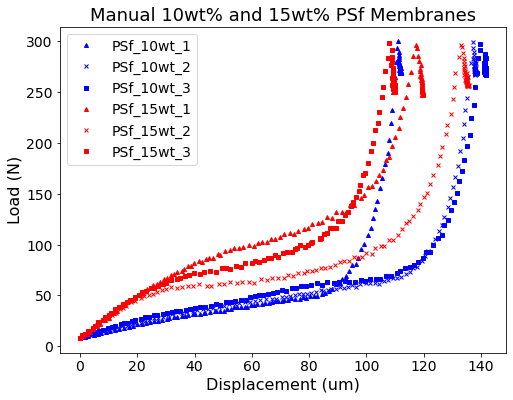

In [43]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
# make a list of 6 different line types with different colors
line_type = ['b^', 'bx', 'bs', 'r^', 'rx', 'rs']
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    # plot less frequent data points
    plt.plot(data['S:LVDT (um)'][::80], data['Ch:Load (N)'][::80], line_type[i], label=data_name, markersize=4)
    #plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], line_type[i] ,label=data_name)

# show title and labels
plt.title('Manual 10wt% and 15wt% PSf Membranes', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Displacement (um)', fontsize = 16)
plt.ylabel('Load (N)', fontsize = 16)
plt.legend(loc='upper left', fontsize= 14)
plt.show()

In [6]:
# save the S:LVDT (um) value at the maximum Ch:Load (N) for each test
max_displacement = []
for df in data_list:
    df = df[df['Ch:Load (N)'] > 8]
    df['S:LVDT (um)'] = df['S:LVDT (um)'] - df['S:LVDT (um)'].iloc[0]
    # find the index of the maximum load
    max_load_index = df['Ch:Load (N)'].idxmax()
    # save the S:LVDT value at the maximum load
    max_load = df.loc[max_load_index, 'S:LVDT (um)']
    max_displacement.append(max_load)
max_displacement




C:\Users\wang9\AppData\Local\Temp\ipykernel_21728\3809523491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S:LVDT (um)'] = df['S:LVDT (um)'] - df['S:LVDT (um)'].iloc[0]


[110.71859999999998,
 137.1092,
 139.39519999999996,
 117.60199999999986,
 133.0706,
 107.74680000000012]

In [7]:
top_layer_thickness = [18.51, 15.5371,13.8596,25.6578,17.9823,22.19]

In [8]:
top_layer_thickness_percent = [0.1344,0.128078238,0.111179379,0.196029451,0.145393219,0.1828]


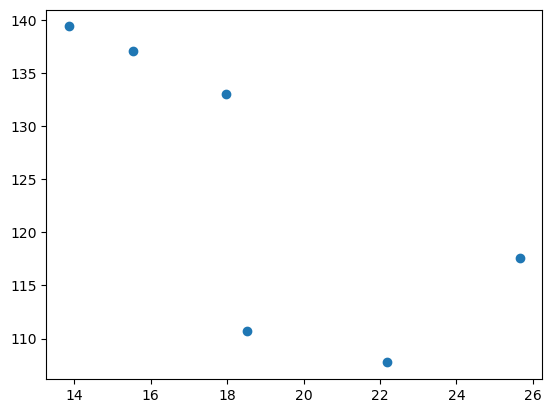

In [9]:
# plot top_layer_thickness over max_displacement
plt.scatter(top_layer_thickness,max_displacement)

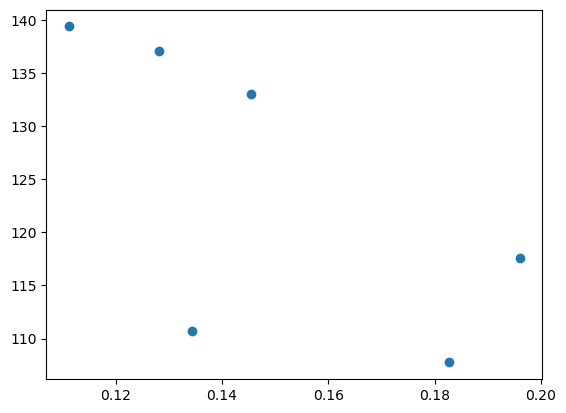

In [10]:
plt.scatter(top_layer_thickness_percent,max_displacement)

# I-18

In [45]:
I18_1 = pd.read_csv('Data/I-18_1_1_07282023_141413.csv')
I18_2 = pd.read_csv('Data/I-18_1_2_07282023_141649.csv')
I18_3 = pd.read_csv('Data/I-18_1_3_07282023_141913.csv')
I18_4 = pd.read_csv('Data/I-18_1_4_07282023_142145.csv')
I18_5 = pd.read_csv('Data/I-18_1_5_07282023_142425.csv')
data_list = [I18_1, I18_2, I18_3, I18_4, I18_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_30099/3429318931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_30099/3429318931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_30099/3429318931.py:9: SettingWithCopyWarning: 
A val

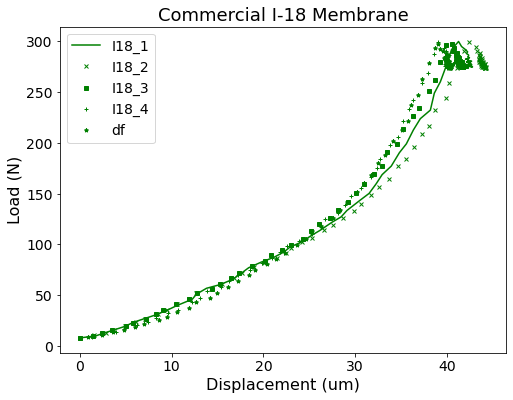

In [52]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
# make a list of 6 different line types with green color
line_type = ['g', 'gx', 'gs', 'g+', 'g*', 'gh']
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'][::80], data['Ch:Load (N)'][::80], line_type[i], label=data_name, markersize=4)
    #plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], line_type[i], label=data_name, makersize=4)
# show title and labels
plt.title('Commercial I-18 Membrane', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Displacement (um)', fontsize = 16)
plt.ylabel('Load (N)', fontsize = 16)
plt.legend(loc='upper left', fontsize= 14)
plt.show()

# I-18 Polished pin

In [4]:
Polished_I18_1_1 = pd.read_csv('Data/Polished Pin I-18 - 1_08162023_160535.csv')
Polished_I18_1_2 = pd.read_csv('Data/Polished Pin I-18 - 2_08162023_161036.csv')
Polished_I18_1_3 = pd.read_csv('Data/Polished Pin I-18 - 3_08162023_161240.csv')
Polished_I18_1_4 = pd.read_csv('Data/Polished Pin I-18 - 4_08162023_161454.csv')
Polished_I18_1_5 = pd.read_csv('Data/Polished Pin I-18 - 5_08162023_161721.csv')
data_list = [Polished_I18_1_1, Polished_I18_1_2, Polished_I18_1_3, Polished_I18_1_4, Polished_I18_1_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_21728\1389210162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


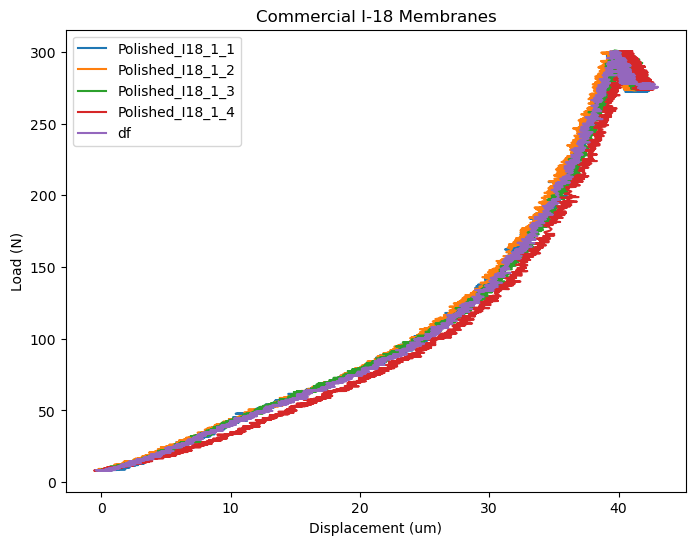

In [14]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New Pin I-18

In [10]:
New_pin_I18_1_1 = pd.read_csv('Data/New pin I-18-1_08172023_165722.csv')
New_pin_I18_1_2 = pd.read_csv('Data/New pin I-18-2_08172023_170006.csv')
#New_pin_I18_1_3 = pd.read_csv('Data/New pin I-18-3_08172023_170343.csv')
New_pin_I18_1_4 = pd.read_csv('Data/New pin I-18-4_08172023_171119.csv')
New_pin_I18_1_5 = pd.read_csv('Data/New pin I-18-5_08172023_171354.csv')
New_pin_I18_1_6 = pd.read_csv('Data/New pin I-18-6_08172023_171616.csv')
Polished_I18_1_1 = pd.read_csv('Data/Polished Pin I-18 - 1_08162023_160535.csv')
Polished_I18_1_2 = pd.read_csv('Data/Polished Pin I-18 - 2_08162023_161036.csv')
Polished_I18_1_3 = pd.read_csv('Data/Polished Pin I-18 - 3_08162023_161240.csv')
Polished_I18_1_4 = pd.read_csv('Data/Polished Pin I-18 - 4_08162023_161454.csv')
Polished_I18_1_5 = pd.read_csv('Data/Polished Pin I-18 - 5_08162023_161721.csv')
New_pin_I18_old_sample_1_1 = pd.read_csv('Data/New pin I-18 old sample 1_08172023_174518.csv')
New_pin_I18_old_sample_1_2 = pd.read_csv('Data/New pin I-18 old sample 2_08172023_174820.csv')
New_pin_I18_old_sample_1_3 = pd.read_csv('Data/New pin I-18 old sample 3_08172023_175117.csv')
New_pin_I18_old_sample_1_4 = pd.read_csv('Data/New pin I-18 old sample 4_08172023_175409.csv')
New_pin_I18_old_sample_1_5 = pd.read_csv('Data/New pin I-18 old sample 5_08172023_175638.csv')
#data_list = [New_pin_I18_1_1, New_pin_I18_1_2, New_pin_I18_1_3, New_pin_I18_1_4, New_pin_I18_1_5, New_pin_I18_1_6]
data_list = [New_pin_I18_1_1, New_pin_I18_1_2, New_pin_I18_1_4, New_pin_I18_1_5, New_pin_I18_1_6, Polished_I18_1_1, Polished_I18_1_2, Polished_I18_1_3, Polished_I18_1_4, Polished_I18_1_5, New_pin_I18_old_sample_1_1, New_pin_I18_old_sample_1_2, New_pin_I18_old_sample_1_3, New_pin_I18_old_sample_1_4, New_pin_I18_old_sample_1_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_8340\1389210162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


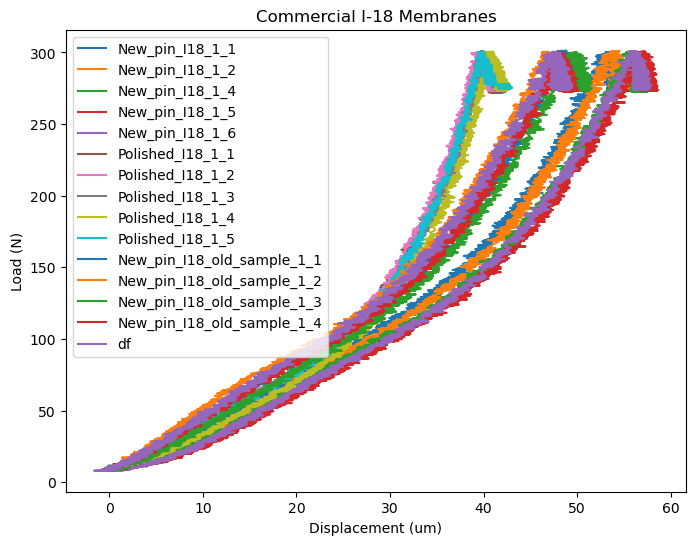

In [19]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# All pin I-18 compare

In [22]:
I18_1_1 = pd.read_csv('Data/I-18_1_1_07282023_141413.csv')
Polished_I18_1_1 = pd.read_csv('Data/Polished Pin I-18 - 1_08162023_160535.csv')
New_pin_I18_old_sample_1_1 = pd.read_csv('Data/New pin I-18 old sample 1_08172023_174518.csv')
New_pin_I18_1_1 = pd.read_csv('Data/New pin I-18-1_08172023_165722.csv')
data_list = [I18_1_1, Polished_I18_1_1, New_pin_I18_old_sample_1_1, New_pin_I18_1_1]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_8340\1389210162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


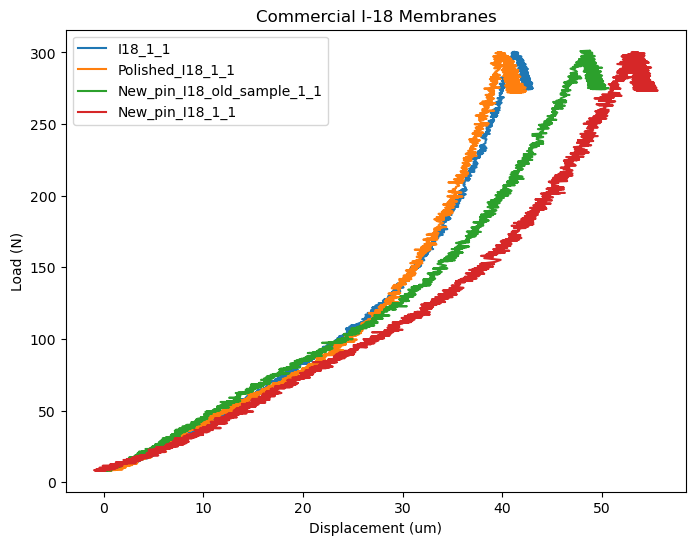

In [53]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New Pin AD

In [47]:
New_pin_AD_1_1 = pd.read_csv('Data/New pin align test AD_08172023_162204.csv')
New_pin_AD_1_3 = pd.read_csv('Data/New pin align test AD 3_08172023_164742.csv')
New_pin_AD_1_4 = pd.read_csv('Data/New pin align test AD 4_08172023_165008.csv')
New_pin_AD_1_5 = pd.read_csv('Data/New pin align test AD 5_08172023_165203.csv')
New_pin_AD_1_6 = pd.read_csv('Data/New pin align test AD 6_08172023_165409.csv')
data_list = [New_pin_AD_1_1, New_pin_AD_1_3, New_pin_AD_1_4, New_pin_AD_1_5, New_pin_AD_1_6]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_8340\1696128854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


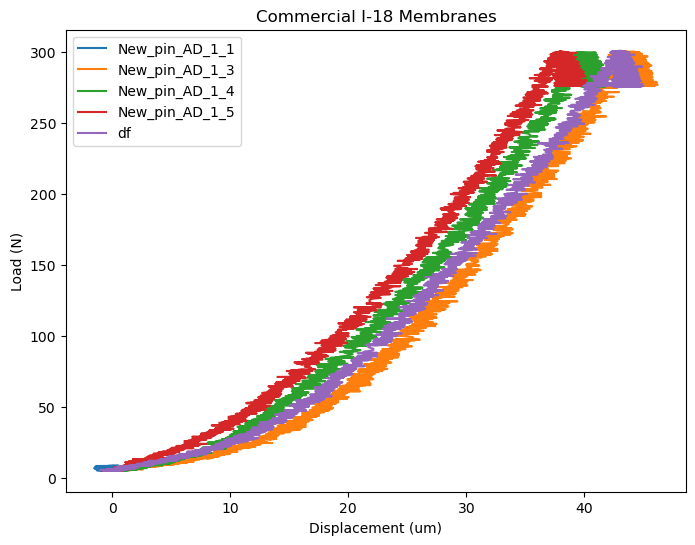

In [50]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New Old I-18

In [2]:
New_old_I18_1 = pd.read_csv('Data/New old I18 1_08182023_114853.csv')
New_old_I18_2 = pd.read_csv('Data/New old I18 2_08182023_115420.csv')
New_old_I18_3 = pd.read_csv('Data/New old I18 3_08182023_115753.csv')
New_old_I18_4_new_align = pd.read_csv('Data/New old I18 4 new align_08182023_120245.csv')
New_old_I18_5_new_align = pd.read_csv('Data/New old I18 5 new align_08182023_120847.csv')
New_old_I18_6_new_align = pd.read_csv('Data/New old I18 6 new align_08182023_121251.csv')
New_old_I18_7_new_align = pd.read_csv('Data/New old I18 7 new align_08182023_121647.csv')
data_list = [New_old_I18_1, New_old_I18_2, New_old_I18_3, New_old_I18_4_new_align, New_old_I18_5_new_align, New_old_I18_6_new_align, New_old_I18_7_new_align]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_1956\3810659739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


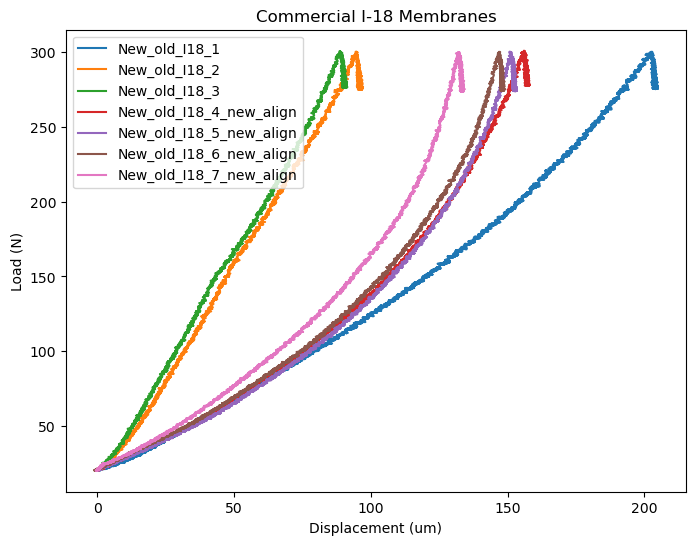

In [5]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 20]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New New I18

In [77]:
New_new_I18_1_new_align = pd.read_csv('Data/New new I18 1 new align_08182023_122046.csv')
New_new_I18_2_new_align = pd.read_csv('Data/New new I18 2 new align_08182023_122428.csv')
New_new_I18_3_new_align = pd.read_csv('Data/New new I18 3 new align_08182023_122823.csv')
New_new_I18_4_new_align = pd.read_csv('Data/New new I18 4 new align_08182023_123207.csv')
New_new_I18_5_new_align = pd.read_csv('Data/New new I18 5 new align_08182023_123735.csv')
#data_list = [New_new_I18_1_new_align, New_new_I18_3_new_align, New_new_I18_4_new_align, New_new_I18_5_new_align, New_old_I18_2, New_old_I18_3, New_old_I18_4_new_align, New_old_I18_5_new_align, New_old_I18_6_new_align, New_pin_I18_old_sample_1_1, New_pin_I18_old_sample_1_2, New_pin_I18_old_sample_1_3, New_pin_I18_old_sample_1_4, New_pin_I18_old_sample_1_5, New_pin_I18_1_1, New_pin_I18_1_2, New_pin_I18_1_4, New_pin_I18_1_5, New_pin_I18_1_6]
#data_list = [New_new_I18_1_new_align, New_old_I18_3, New_old_I18_5_new_align, New_pin_I18_old_sample_1_1, New_pin_I18_1_1]
Sample2_Alignment1_before = New_pin_I18_1_1
Sample1_Alignment1_after = New_pin_I18_old_sample_1_1
Sample1_Alignment2_after = New_old_I18_3
Sample1_Alignment3_after = New_old_I18_5_new_align
Sample2_Alignment3_after = New_new_I18_1_new_align

data_list = [I18_1_1, Polished_I18_1_1, Sample2_Alignment1_before, Sample1_Alignment1_after, Sample1_Alignment2_after, Sample1_Alignment3_after, Sample2_Alignment3_after]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_1956\717622042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


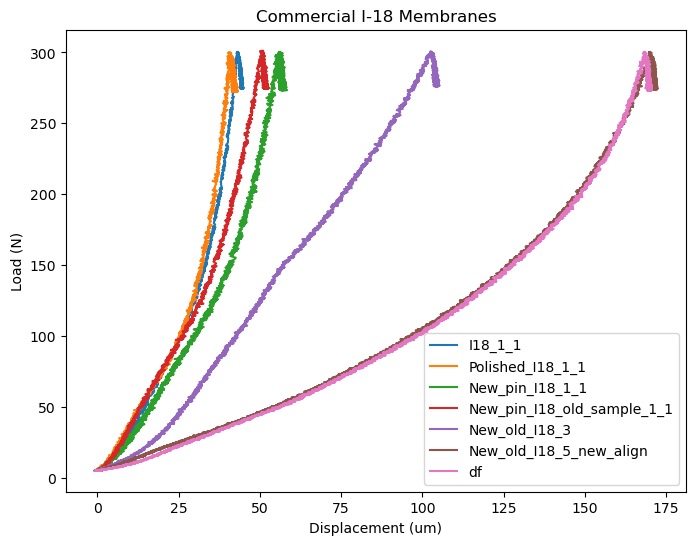

In [78]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='lower right')
plt.show()

# Polished pin I18 After

In [7]:
Polished_I18_1 = pd.read_csv('Data/I-18 Polished After 1_08182023_170759.csv')
Polished_I18_2 = pd.read_csv('Data/I-18 Polished After 2_08182023_171106.csv')
Polished_I18_3 = pd.read_csv('Data/I-18 Polished After 3_08182023_171310.csv')
Polished_I18_4 = pd.read_csv('Data/I-18 Polished After 4_08182023_171528.csv')
Polished_I18_5 = pd.read_csv('Data/I-18 Polished After 5_08182023_171901.csv')
Polished_old_I18_1 = pd.read_csv('Data/Polished old I18 after 1_08182023_173538.csv')
Polished_old_I18_2 = pd.read_csv('Data/Polished old I18 after 2_08182023_173843.csv')
Polished_old_I18_3 = pd.read_csv('Data/Polished old I18 after 3_08182023_174104.csv')
data_list = [Polished_I18_1, Polished_I18_2, Polished_I18_3, Polished_I18_4, Polished_I18_5, Polished_I18_1_1, Polished_I18_1_2, Polished_I18_1_3, Polished_I18_1_4, Polished_I18_1_5, Polished_old_I18_1, Polished_old_I18_2, Polished_old_I18_3]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_4184\717622042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


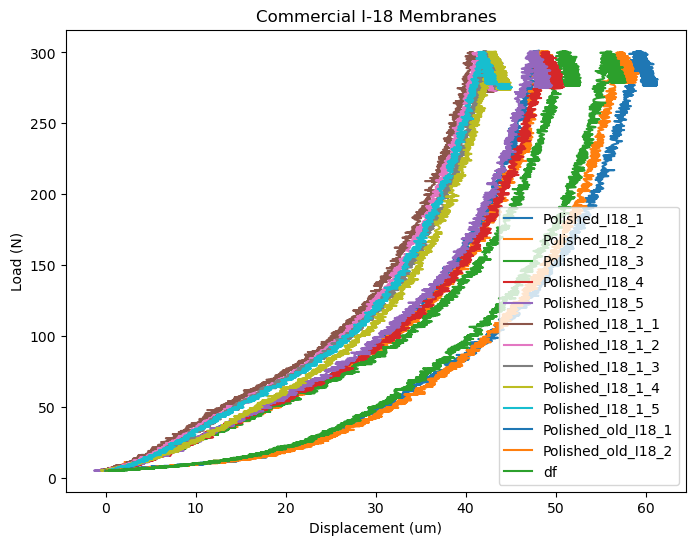

In [13]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='lower right')
plt.show()